In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import joblib 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

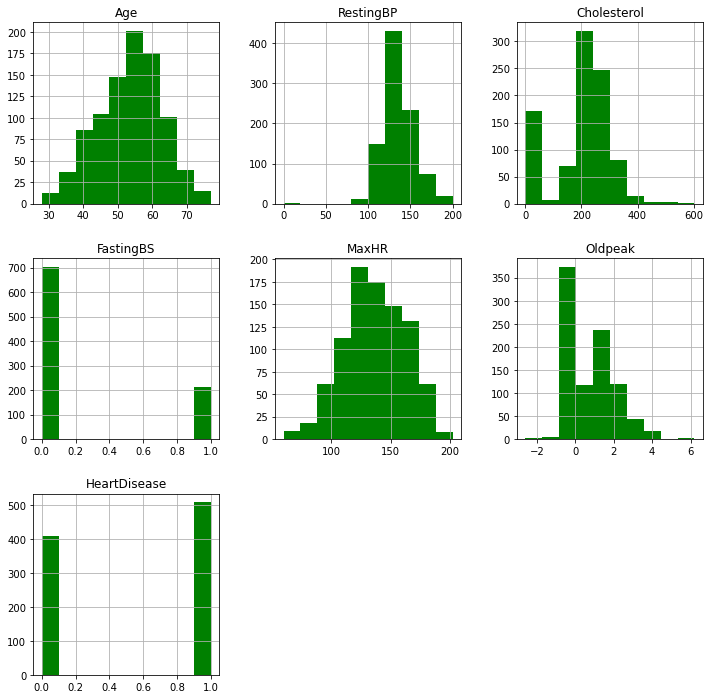

In [17]:
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 16
#fig_size[1] = 48
#plt.rcParams["figure.figsize"] = fig_size


fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=12
fig_size[1]=12
df.hist(color="green")
plt.show()

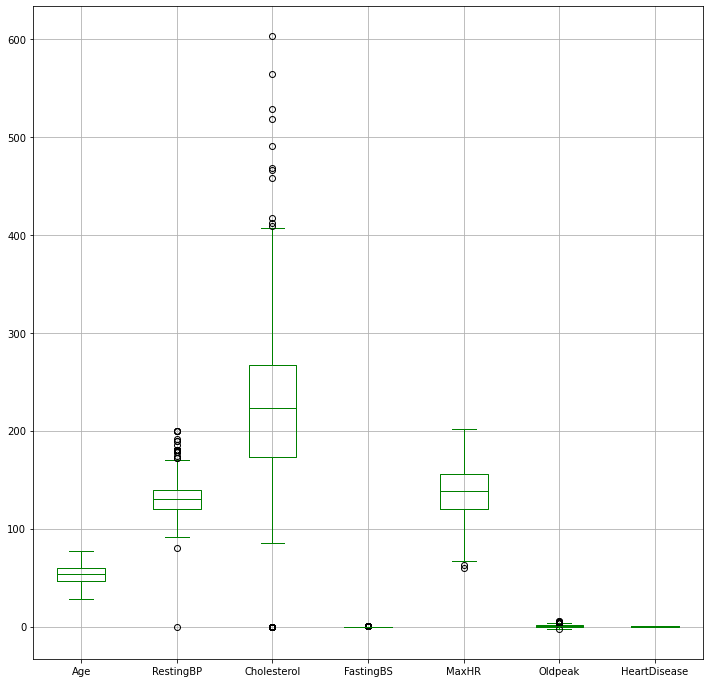

In [18]:
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=12
fig_size[1]=12
df.boxplot(color="green")
plt.show()

In [19]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [20]:
df.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [21]:
dummies=pd.get_dummies(df.ChestPainType)
dummies

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [22]:
df1=pd.concat([df,dummies],axis=1)
df1.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0


In [23]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [30]:
df1.RestingECG=lab.fit_transform(df.RestingECG)
df1.RestingECG

0      1
1      1
2      2
3      1
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: RestingECG, Length: 918, dtype: int64

In [27]:
df.RestingECG.value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

In [28]:
df.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [31]:
df1.ExerciseAngina=lab.fit_transform(df.ExerciseAngina)

In [34]:
df1.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [35]:
df1.ST_Slope=lab.fit_transform(df.ST_Slope)

In [38]:
df1.Sex=lab.fit_transform(df.Sex)

In [39]:
df2=df1.copy()

In [40]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40,1,ATA,140,289,0,1,172,0,0.0,2,0,0,1,0,0
1,49,0,NAP,160,180,0,1,156,0,1.0,1,1,0,0,1,0
2,37,1,ATA,130,283,0,2,98,0,0.0,2,0,0,1,0,0
3,48,0,ASY,138,214,0,1,108,1,1.5,1,1,1,0,0,0
4,54,1,NAP,150,195,0,1,122,0,0.0,2,0,0,0,1,0


In [69]:
df3=df2.drop(["ChestPainType"],axis=1)

In [70]:
df3.shape

(918, 15)

In [71]:
df3.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40,1,140,289,0,1,172,0,0.0,2,0,0,1,0,0
1,49,0,160,180,0,1,156,0,1.0,1,1,0,0,1,0
2,37,1,130,283,0,2,98,0,0.0,2,0,0,1,0,0
3,48,0,138,214,0,1,108,1,1.5,1,1,1,0,0,0
4,54,1,150,195,0,1,122,0,0.0,2,0,0,0,1,0


In [72]:
# Removing the outliers
df3[df3["Cholesterol"]>((df3.Cholesterol.mean())+(3*df3.Cholesterol.std()))]


,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
76,32,1,118,529,0,1,130,0,0.0,1,1,1,0,0,0
149,54,1,130,603,1,1,125,1,1.0,1,1,1,0,0,0
616,67,0,115,564,0,0,160,0,1.6,1,0,0,0,1,0


In [73]:
df3.shape

(918, 15)

In [74]:
df3=df3[df3["Cholesterol"]<=((df3.Cholesterol.mean())+(3*df3.Cholesterol.std()))]

In [78]:
df3.shape

(915, 15)

In [79]:
df3["z-score"]=((df3.Cholesterol.mean())+(3*df3.Cholesterol.std()))

In [80]:
df3[["Cholesterol","z-score"]]

,Cholesterol,z-score
0,289,520.132765
1,180,520.132765
2,283,520.132765
3,214,520.132765
4,195,520.132765
...,...,...
913,264,520.132765
914,193,520.132765
915,131,520.132765
916,236,520.132765


In [81]:
df4=df3.drop(['z-score'],axis=1)

In [82]:
df4[df4.MaxHR>(df4.MaxHR.mean()+3*df4.MaxHR.std())]

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA


In [83]:
df4.shape

(915, 15)

In [84]:
df4[df4.FastingBS>(df4.FastingBS.mean()+3*df4.FastingBS.std())]

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA


In [85]:
df4.shape

(915, 15)

In [86]:
df4[df4.Oldpeak>(df4.Oldpeak.mean()+3*df4.Oldpeak.std())]

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
166,50,1,140,231,0,2,140,1,5.0,1,1,1,0,0,0
702,59,1,178,270,0,0,145,0,4.2,0,0,0,0,0,1
771,55,1,140,217,0,1,111,1,5.6,0,1,1,0,0,0
791,51,1,140,298,0,1,122,1,4.2,1,1,1,0,0,0
850,62,0,160,164,0,0,145,0,6.2,0,1,1,0,0,0
900,58,1,114,318,0,2,140,0,4.4,0,1,1,0,0,0


In [87]:
df4.shape

(915, 15)

In [88]:
df5 = df4[df4.Oldpeak<=(df4.Oldpeak.mean()+3*df4.Oldpeak.std())]

In [89]:
df5.shape

(909, 15)

In [92]:
df5[df5.RestingBP>(df5.RestingBP.mean()+3*df5.RestingBP.std())]

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
109,39,1,190,241,0,1,106,0,0.0,2,0,0,1,0,0
241,54,1,200,198,0,1,142,1,2.0,1,1,1,0,0,0
365,64,0,200,0,0,1,140,1,1.0,1,1,1,0,0,0
399,61,1,200,0,1,2,70,0,0.0,1,1,0,0,1,0
592,61,1,190,287,1,0,150,1,2.0,0,1,1,0,0,0
732,56,0,200,288,1,0,133,1,4.0,0,1,1,0,0,0
759,54,1,192,283,0,0,195,0,0.0,2,1,0,1,0,0


In [93]:
df6=df5[df5.RestingBP<=(df5.RestingBP.mean()+3*df5.RestingBP.std())]

In [94]:
df6.shape

(902, 15)

In [95]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 917
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             902 non-null    int64  
 1   Sex             902 non-null    int32  
 2   RestingBP       902 non-null    int64  
 3   Cholesterol     902 non-null    int64  
 4   FastingBS       902 non-null    int64  
 5   RestingECG      902 non-null    int64  
 6   MaxHR           902 non-null    int64  
 7   ExerciseAngina  902 non-null    int64  
 8   Oldpeak         902 non-null    float64
 9   ST_Slope        902 non-null    int32  
 10  HeartDisease    902 non-null    int64  
 11  ASY             902 non-null    uint8  
 12  ATA             902 non-null    uint8  
 13  NAP             902 non-null    uint8  
 14  TA              902 non-null    uint8  
dtypes: float64(1), int32(2), int64(8), uint8(4)
memory usage: 81.0 KB


In [96]:
X=df6.drop(["HeartDisease"],axis=1)
y=df6["HeartDisease"]

In [97]:
scalar=StandardScaler()
X_Scaled=scalar.fit_transform(X)

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,y,test_size=0.3,random_state=10)

In [99]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [100]:
model.score(X_test,y_test)

0.8302583025830258

In [101]:
y_predict=model.predict(X_test)

In [102]:
accuracy_score(y_test,y_predict)

0.8302583025830258

In [105]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),X,y,cv=4,)

array([0.84070796, 0.86283186, 0.85333333, 0.72888889])

In [120]:
models_param={
    'svm':{
        'model':SVC(gamma="auto"),
        'params':{
            'C':[1,10,20],
            "kernel":["rbf","linear"]
        }
    },
    'randomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'LogesticRegression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}
scores=[]

for model_name,mp in models_param.items():
    gscv=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    gscv.fit(X_train,y_train)
    scores.append({'model': model_name,
                  'best_Score':gscv.best_score_,
               'best_param':gscv.best_params_}
    )
df_score=pd.DataFrame(scores,columns=['model','best_Score','best_param'])
df_score

,model,best_Score,best_param
0,svm,0.865329,"{'C': 10, 'kernel': 'linear'}"
1,randomForest,0.841532,{'n_estimators': 10}
2,LogesticRegression,0.855806,{'C': 10}


In [121]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

In [123]:
X_pca=pca.fit_transform(X)
X_pca

array([[ 93.82543641, -29.40274627],
       [-15.58339545, -14.11231409],
       [ 83.29487014,  38.68602579],
       ...,
       [-67.57296625,  17.61550234],
       [ 40.70488291, -33.39360855],
       [-19.91284052, -37.2933691 ]])

In [124]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [125]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

0.7403314917127072

In [ ]:
The score have reduced using PCA 